<a href="https://colab.research.google.com/github/keonju2/2022_GDSC_DL/blob/main/DL_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drop Out Layer 변화 확인

In [13]:
import torch
m = torch.nn.Dropout(p=0.5)
input = torch.randn(4, 4)
output = m(input)

print(input)
print(output)

tensor([[ 0.2254, -0.9062, -0.4299,  1.6463],
        [-1.2291,  0.0869, -2.4453,  0.1378],
        [-1.8000,  0.4146, -2.0549,  0.1246],
        [ 0.4614, -0.4728, -0.4073, -0.2546]])
tensor([[ 0.0000, -0.0000, -0.0000,  3.2925],
        [-2.4583,  0.1739, -0.0000,  0.2756],
        [-3.5999,  0.0000, -0.0000,  0.2491],
        [ 0.9229, -0.0000, -0.8145, -0.5093]])


# Batch Normalization 확인하기

In [14]:
m = torch.nn.BatchNorm1d(5)
input = torch.randn(5, 5)
output = m(input)

print(input)
print(output)
print(output.mean(axis=0),output.var(axis=0))

tensor([[ 1.0672,  2.5851, -0.2334, -0.8594, -1.4586],
        [ 2.3348,  0.4074,  0.5087, -0.7961, -0.0964],
        [ 0.4114,  0.5845,  0.0160,  0.7535,  1.6147],
        [-0.2029,  0.9544,  1.4395, -0.3954, -0.2244],
        [ 1.4031, -0.0821,  0.7116,  1.0394, -0.6722]])
tensor([[ 0.0745,  1.8610, -1.2384, -1.0155, -1.2777],
        [ 1.5398, -0.5296,  0.0347, -0.9360,  0.0702],
        [-0.6835, -0.3352, -0.8105,  1.0121,  1.7634],
        [-1.3936,  0.0708,  1.6314, -0.4322, -0.0564],
        [ 0.4628, -1.0670,  0.3828,  1.3716, -0.4995]],
       grad_fn=<NativeBatchNormBackward0>)
tensor([-1.9073e-07,  4.7684e-08,  1.1921e-08,  0.0000e+00, -3.4273e-08],
       grad_fn=<MeanBackward1>) tensor([1.2500, 1.2500, 1.2500, 1.2500, 1.2500], grad_fn=<VarBackward0>)


# Weight Decay

In [15]:
# 재료 준비
import torch

In [16]:
# device 설정 (gpu & cpu)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# random seed 고정 (항상 같은 결과값이 나오게 하기 위함)
torch. manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [17]:
# data 입력 (xor 문제)
x = torch.FloatTensor([[0,0],[1,0],[0,1],[1,1]]).to(device)
y = torch.FloatTensor([[0],[1],[1],[0]]).to(device)

In [18]:
# layer 정의: mlp 4개 + 활성화 함수
linear1 = torch.nn.Linear(2, 10, bias = True) # input shape이 (4,2) -> 앞의 부분은 hidden layer에 입력으로 들어가는 shape인 2, 뒤에 부분은 hidden layer에서 출력되는 shape인 10
linear2 = torch.nn.Linear(10, 10, bias = True) # 위에서 출력한 값이 입력으로 들어감
linear3 = torch.nn.Linear(10, 10, bias = True) # 동일
linear4 = torch.nn.Linear(10, 1, bias = True) # 최종 output은 y와 동일해야 하므로 출력되는 shape를 1로 설정
sigmoid = torch.nn.Sigmoid() # 활성화 함수는 sigmoid 설정

In [19]:
# 실제로 모델을 만드는 부분
# 제일 처음 입력한 layer, 즉 linear1에 x값이 들어감 (만약 linear2를 입력했다면 linear2에 들어가겠지만 shape이 다르니까 오류가 나겠죠?) -> 활성화 함수를 거치고 이 값이 linear2에 들어감 -> 끝날 때까지 반복
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device) 

In [20]:
# loss function과 optimizer 선언
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1) # learning rate 0.1(너무 작았음) -> 1(적당) -> 10(발산)

In [21]:
for epoch in range(10000):
  optimizer.zero_grad() # optimizer에 저장된 gradient값을 0으로 초기화 
  hypothesis = model(x) # 예측값 뽑아내기
  cost = criterion(hypothesis, y) # loss 계산
  l2_reg = 0
  for param in model.parameters():
      l2_reg += torch.norm(param)
            
  cost += l2_reg
  cost.backward() # loss를 back propagation 연산
  optimizer.step() # back propatation의 결과를 바탕으로 optimizer를 이용해 weight 업데이트

  if epoch % 100 == 0:
    print(epoch, cost.item()) # item은 숫자만 뽑아내기 위한 메소드

0 9.699116706848145
100 4.561418533325195
200 4.247811317443848
300 4.408544063568115
400 4.224440574645996
500 4.2232666015625
600 5.137466907501221
700 5.421236038208008
800 5.697321891784668
900 6.1138763427734375
1000 4.403495788574219
1100 4.599785804748535
1200 4.611469268798828
1300 5.572307586669922
1400 5.482950687408447
1500 5.324123382568359
1600 4.999040603637695
1700 5.091305732727051
1800 4.793929100036621
1900 4.853506088256836
2000 5.676966667175293
2100 5.59010124206543
2200 5.546825885772705
2300 5.656026840209961
2400 5.597785472869873
2500 5.799881935119629
2600 3.6528677940368652
2700 4.113516330718994
2800 3.966050624847412
2900 3.93380069732666
3000 4.018319129943848
3100 3.9154117107391357
3200 4.851645469665527
3300 4.6972856521606445
3400 4.615104675292969
3500 4.4547600746154785
3600 4.274186134338379
3700 4.040468215942383
3800 4.1759796142578125
3900 4.178628921508789
4000 4.095881938934326
4100 4.139564037322998
4200 4.180917739868164
4300 4.14522266387939

# Drop Out & BatchNormalization

In [25]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
# 데이터를 훈련용과 테스트용으로 분리
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from torchsummary import summary
import matplotlib.pyplot as plt

# 전체의 20%는 검증용
digits = load_digits()
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

X_train = torch.tensor(X_train, dtype=torch.float32).to("cuda:0")
Y_train = torch.tensor(Y_train, dtype=torch.int64).to("cuda:0")
X_test = torch.tensor(X_test, dtype=torch.float32).to("cuda:0")
Y_test = torch.tensor(Y_test, dtype=torch.int64).to("cuda:0")

In [26]:
model = nn.Sequential(
    nn.Linear(64, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100, 10),
).to("cuda:0")

In [29]:
summary(model.to("cuda:0"), (64,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           6,500
              ReLU-2                  [-1, 100]               0
           Dropout-3                  [-1, 100]               0
            Linear-4                  [-1, 100]          10,100
              ReLU-5                  [-1, 100]               0
           Dropout-6                  [-1, 100]               0
            Linear-7                  [-1, 100]          10,100
              ReLU-8                  [-1, 100]               0
           Dropout-9                  [-1, 100]               0
           Linear-10                  [-1, 100]          10,100
             ReLU-11                  [-1, 100]               0
          Dropout-12                  [-1, 100]               0
           Linear-13                   [-1, 10]           1,010
Total params: 37,810
Trainable params: 

100%|██████████| 100/100 [00:14<00:00,  6.91it/s]


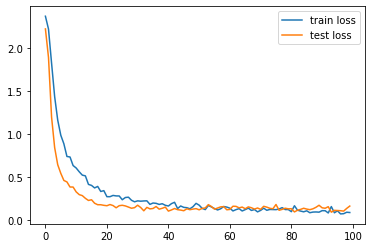

In [30]:
lossFunc = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters())

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

trainLosses = []
testLosses = []

for epoch in tqdm(range(100)):
    runningLoss = 0.0
    # 신경망을 train 모드로 설정
    model.train()
    for i, (batchX, batchY) in enumerate(loader):
        optimizer.zero_grad()
        
        yPred = model(batchX)
        loss = lossFunc(yPred, batchY)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()
    trainLosses.append(runningLoss/i)
    
    # 신경망을 test 모드로 설정
    model.eval()
    yPred = model(X_test)
    testLoss = lossFunc(yPred, Y_test)
    testLosses.append(testLoss.item())

plt.plot(range(100), trainLosses, label = "train loss")
plt.plot(range(100), testLosses, label = "test loss")
plt.legend()

In [31]:
model = nn.Sequential(
    nn.Linear(64, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    nn.Dropout(0.5),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    nn.Dropout(0.5),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    nn.Dropout(0.5),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    nn.Dropout(0.5),
    nn.Linear(100, 10),
).to("cuda:0")

In [32]:
summary(model.to("cuda:0"), (64,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           6,500
              ReLU-2                  [-1, 100]               0
       BatchNorm1d-3                  [-1, 100]             200
           Dropout-4                  [-1, 100]               0
            Linear-5                  [-1, 100]          10,100
              ReLU-6                  [-1, 100]               0
       BatchNorm1d-7                  [-1, 100]             200
           Dropout-8                  [-1, 100]               0
            Linear-9                  [-1, 100]          10,100
             ReLU-10                  [-1, 100]               0
      BatchNorm1d-11                  [-1, 100]             200
          Dropout-12                  [-1, 100]               0
           Linear-13                  [-1, 100]          10,100
             ReLU-14                  [

100%|██████████| 100/100 [00:18<00:00,  5.55it/s]


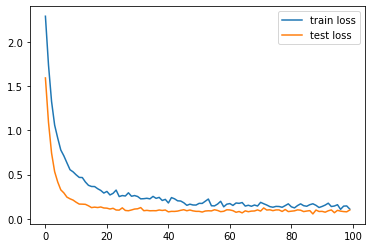

In [33]:
lossFunc = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters())

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

trainLosses = []
testLosses = []

for epoch in tqdm(range(100)):
    runningLoss = 0.0
    # 신경망을 train 모드로 설정
    model.train()
    for i, (batchX, batchY) in enumerate(loader):
        optimizer.zero_grad()
        
        yPred = model(batchX)
        loss = lossFunc(yPred, batchY)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()
    trainLosses.append(runningLoss/i)
    
    # 신경망을 test 모드로 설정
    model.eval()
    yPred = model(X_test)
    testLoss = lossFunc(yPred, Y_test)
    testLosses.append(testLoss.item())

plt.plot(range(100), trainLosses, label = "train loss")
plt.plot(range(100), testLosses, label = "test loss")
plt.legend()